In [1]:
import json
import sys
sys.path.append('/Users/wastechs/Documents/git-repos/energy-efficiency')
from validation.gp.create_train_inference import create_train_inference_gp
from lib.util import helper, data_preprocessing
import torch
import gpytorch

### Preprocess Data

In [28]:
X_train, y_train, X_test, y_test, n_train = data_preprocessing.gp_preprocess(
    machine='xl106_druckmaschine_30T', 
    freq=30,
    normalize_time=True
    )

### 30 minutes agg.

In [29]:
## Locally Periodic Kernel ##
period_constraint_short = gpytorch.constraints.Interval(0.07, 0.11) ## short term

seasonal_periodic_short = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.PeriodicKernel(
        period_length_constraint=period_constraint_short
        )
    )

seasonal_rbf_short = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RBFKernel()
)

locally_short_periodic = seasonal_periodic_short * seasonal_rbf_short

period_constraint_long = gpytorch.constraints.Interval(0.17, 0.21) ## long term

seasonal_periodic_long = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.PeriodicKernel(
        period_length_constraint=period_constraint_long
        )
    )

seasonal_rbf_long = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RBFKernel()
)

locally_long_periodic = seasonal_periodic_long * seasonal_rbf_long

## Local Variations ##
local_variation_alpha = gpytorch.priors.GammaPrior(1, 0.5)

local_variation = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RQKernel()
    )
    
local_variation.alpha = local_variation_alpha

local_variation_2 = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RBFKernel()
    )


covar_module = locally_short_periodic + locally_long_periodic  + local_variation + local_variation_2

### Create, Train, and Perform Inference

In [ ]:
model, likelihood, mse, mape, perf_dev_upper = create_train_inference_gp(
    kernel_gen=covar_module,
    train_x=X_train,
    train_y=y_train,
    test_x=X_test,
    test_y=y_test,
    n_train=n_train,
    time_agg='30T',
    lr=0.1, 
    machine='xl106_druckmaschine',
    update_score=False
)

In [31]:
mse, mape

(2.890029012630809, 196094.92633439755)

### 10 minutes agg..

In [35]:
X_train, y_train, X_test, y_test, n_train = data_preprocessing.gp_preprocess(
    machine='xl106_druckmaschine_10T', 
    freq=10,
    normalize_time=True
    )

In [36]:
## Locally Periodic Kernel ##
period_constraint_short = gpytorch.constraints.Interval(0.06, 0.09) ## short term

seasonal_periodic_short = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.PeriodicKernel(
        period_length_constraint=period_constraint_short
        )
    )

seasonal_rbf_short = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RBFKernel()
)

locally_short_periodic = seasonal_periodic_short * seasonal_rbf_short

period_constraint_long = gpytorch.constraints.Interval(0.18, 0.21) ## long term

seasonal_periodic_long = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.PeriodicKernel(
        period_length_constraint=period_constraint_long
        )
    )

seasonal_rbf_long = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RBFKernel()
)

locally_long_periodic = seasonal_periodic_long * seasonal_rbf_long

## Local Variations ##
local_variation_alpha = gpytorch.priors.GammaPrior(1, 0.5)

local_variation = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RQKernel()
    )
    
local_variation.alpha = local_variation_alpha


covar_module = locally_short_periodic + locally_long_periodic + local_variation

Iter 1 , Loss = 0.982597454420255 , Noise = 0.6932471990585327
Iter 2 , Loss = 0.950564565134419 , Noise = 0.6444966793060303
Iter 3 , Loss = 0.919962028563092 , Noise = 0.5982188582420349
Iter 4 , Loss = 0.8926126648588024 , Noise = 0.5544028878211975
Iter 5 , Loss = 0.8664872484933305 , Noise = 0.5130444765090942
Iter 6 , Loss = 0.8405721230983725 , Noise = 0.474116712808609
Iter 7 , Loss = 0.8150618218705787 , Noise = 0.43757301568984985
Iter 8 , Loss = 0.7904340284050314 , Noise = 0.40335598587989807
Iter 9 , Loss = 0.7671309291549219 , Noise = 0.371404230594635
Iter 10 , Loss = 0.7451790141087028 , Noise = 0.341656893491745
Iter 11 , Loss = 0.7243812190250463 , Noise = 0.31405195593833923
Iter 12 , Loss = 0.7046834229341283 , Noise = 0.28852277994155884
Iter 13 , Loss = 0.6862192757643452 , Noise = 0.2649967670440674
Iter 14 , Loss = 0.6691630118543772 , Noise = 0.2433970719575882
Iter 15 , Loss = 0.6535786337891916 , Noise = 0.22364403307437897
Iter 16 , Loss = 0.6393721036842887

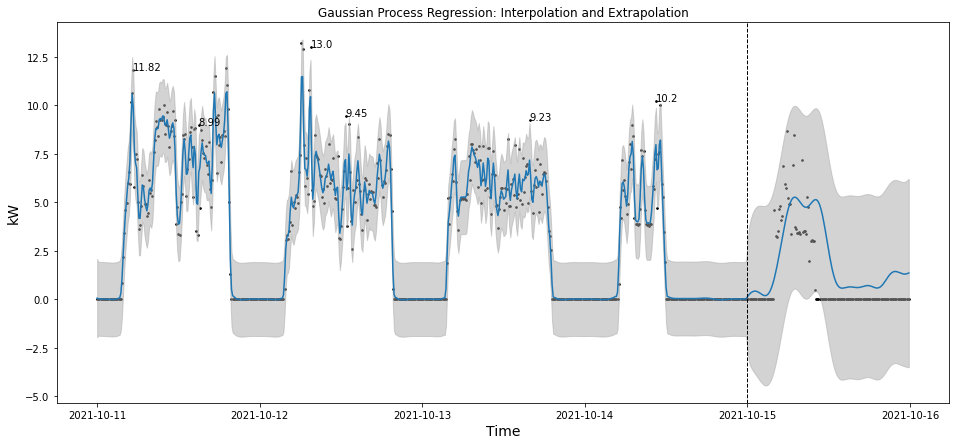

Paper Disposal Machine (Entsorgung)
-----------------------------------
Expected next day energy consumption    =  tensor(139.7377, dtype=torch.float64) kWh
Upper bound next day energy consumption =  tensor(474.5030, dtype=torch.float64) kWh
Lower bound next day energy consumption =  tensor(-195.0275, dtype=torch.float64) kWh


In [37]:
model, likelihood, mse, mape, perf_dev_upper = create_train_inference_gp(
    kernel_gen=covar_module,
    train_x=X_train,
    train_y=y_train,
    test_x=X_test,
    test_y=y_test,
    n_train=n_train,
    time_agg='10T',
    lr=0.1, 
    machine='xl106_druckmaschine',
    update_score=True
)

In [38]:
mse, mape

(3.1079000371581182, 191276.57902893674)